In [11]:
import numpy as np
import matplotlib.pyplot as plt

from problems.dataset import Dataset
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline


In [12]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
mnist.train.images.shape

(55000, 784)

In [14]:
permutation_matrix = np.eye(784)
np.random.seed(0)
np.random.shuffle(permutation_matrix)

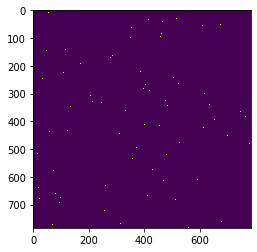

In [15]:
# check that permutation matrix was changed
plt.imshow(permutation_matrix)

In [20]:
def permute_collection(collection, permutation_matrix):
    out_collection = [None]*collection.shape[0]
    for i in range(collection.shape[0]):
        out_collection[i] = permutation_matrix.dot(collection[i])
        
    return out_collection

In [21]:
NEW_mnisttrain = permute_collection(mnist.train.images, permutation_matrix)

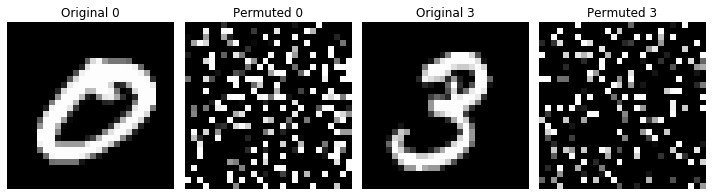

In [49]:
cmap='gray'

ind = 505
plt.figure(figsize=(10,3))
plt.subplot(141)
plt.imshow(np.reshape(mnist.train.images[ind],(28,28)), cmap=cmap)
plt.title("Original {}".format(mnist.train.labels[ind]))
plt.axis('off')

plt.subplot(142)
plt.imshow(np.reshape(permutation_matrix.dot(mnist.train.images[ind]),(28,28)), cmap=cmap)
plt.title("Permuted {}".format(mnist.train.labels[ind]))
plt.axis('off')

ind=1
plt.subplot(143)
plt.imshow(np.reshape(mnist.train.images[ind],(28,28)), cmap=cmap)
plt.title("Original {}".format(mnist.train.labels[ind]))
plt.axis('off')

plt.subplot(144)
plt.imshow(np.reshape(permutation_matrix.dot(mnist.train.images[ind]),(28,28)), cmap=cmap)
plt.title("Permuted {}".format(mnist.train.labels[ind]))
plt.axis('off')

plt.tight_layout()

plt.savefig("./processing/figures/permuted_mnist_sample_images.png", dpi=300)

plt.show()

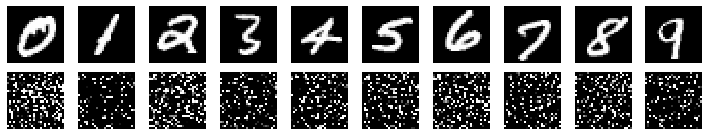

In [62]:
cmap='gray'

plt.figure(figsize=(10,2))

for i in range(10):
    # plot correct images
    ind = np.where(mnist.train.labels==i)[0][26]
    plt.subplot(2,10,i+1)
    plt.imshow(np.reshape(mnist.train.images[ind],(28,28)), cmap=cmap)
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(np.reshape(NEW_mnisttrain[ind],(28,28)), cmap=cmap)
    plt.axis('off')

plt.tight_layout()

plt.savefig("./processing/figures/permuted_mnist_sample_images_all.png", dpi=300)

plt.show()

In [63]:
import numpy as np
import matplotlib.pyplot as plt

from problems.adding_problem import AddingProblemDataset
from problems.copying_memory_problem import CopyingMemoryProblemDataset

In [92]:
# examine copy memory problem
cm_data = CopyingMemoryProblemDataset(1,25)

In [93]:
cm_input = cm_data.X_train[0].flatten().tolist()
cm_input = [int(inpt) for inpt in cm_input]
cm_output = cm_data.Y_train[0].flatten().tolist()
cm_output = [int(inpt) for inpt in cm_output]

In [94]:
print(cm_input)
print(cm_output)

[1, 4, 8, 8, 3, 4, 8, 7, 8, 7, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 8, 8, 3, 4, 8, 7, 8, 7]


In [111]:
# examine adding problem
ap_data = AddingProblemDataset(1, 10)

INFO:tensorflow:Seeding adding problem data set for reproducibility.
INFO:tensorflow:Seeding adding problem data set for reproducibility.
INFO:tensorflow:Seeding adding problem data set for reproducibility.


In [112]:
ap_input = ap_data.X_train[0]
print(["{:0.3f}".format(inpt) for inpt in ap_input[:,0]])
print(ap_input[:,1])

['0.375', '0.951', '0.732', '0.599', '0.156', '0.156', '0.058', '0.866', '0.601', '0.708']
[0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


In [114]:
ap_data.Y_train[0]

array([0.21410225])